#                            ANZ Chengdu Data Science Compertition

## Competition background

ANZ is a leading bank in Australia and New Zealand and in Asia. From 7 November 2018 we'll officially open the ANZ Chengdu Data Science Competition. 
This is the first data science competition we've organised of this type. We hope you're excited too because the prize is a good one: in addition to the cash prizes we're 

offering internships/employment opportunities with ANZ to the winners and/or highly regarded entrants!  

### The challenge: predict (using provided datasets) whether the client will subscribe to a term deposit.  

Participants are expected to undertake a thorough analysis of the dataset and build a prediction model to solve this business problem.

We are looking for participants who can design a customer response model with high differentiation power and high precision by analyzing customer's multi-dimensional banking information and customer behavior characteristics, using data analysis and advanced machine learning algorithms. 

Our expert judging panel look forward to receiving your submission by 18 November 2018.  

Up to 10 groups or individuals will be selected as finalists to deliver a presentation of their findings. Winners will be announced on 23 November 2018.  

Please explore this site for instructions about the competition and how to enter, as well as information about ANZ, why we're focused on data and digital, what it's like to work with us and our proud history as a market leader bank in Australia and New Zealand and beyond dating back more than 180 years.   

## Task

You are provided with a dataset which is related to direct marketing campaigns (phone calls) of a banking institution. 

The business problem is to predict whether the client will subscribe to a term deposit. 

Participants are expected to undertake a thorough analysis of the dataset and build a prediction model to solve this business problem.  

Business suggestions are welcomed but not mandatory.  

Participants will be required to submit analysis along with modelling/algorithm design and validation for judging.  

The judging panel will assess entries in accordance with the competition requirements and select up to 10 finalists who will progress to complete a presentation.  

Finalists will be invited to ANZ Chengdu Office (or dial in) to present their entry in English. The presentation gives you the opportunity to further explain how your entry addresses the business problem. 

## Data
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

You will need to download the dataset with all examples and 20 inputs, ordered by date (from May 2008 to November 2010).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y). 

### Attribute Information:
#### a) Input variables:
##### bank client data:
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has home loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')
##### related with the last contact of the current campaign:
8. contact: contact communication type (categorical: 'cellular','telephone') 
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
##### other attributes:
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
##### social and economic context attributes：
16. emp.var.rate: employment variation rate. quarterly indicator (numeric)
17. cons.price.idx: consumer price index. monthly indicator (numeric) 
18. cons.conf.idx: consumer confidence index. monthly indicator (numeric) 
19. euribor3m: euribor 3 month rate. daily indicator (numeric)
20. nr.employed: number of employees. quarterly indicator (numeric)
#### b) Output variable (desired target):
21. y - has the client subscribed a term deposit? (binary: 'yes','no')
#### Reference:
1.  [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014
2. The dataset and its attribute information are obtained from UCI Machine Learning Repository:
https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

# 1. Data Preprocessing and Visualization

In [4]:
# Importing Data Analysis Librarys
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
import warnings

warnings.filterwarnings('ignore')


In [5]:
# Loaded the datasets
df = pd.read_csv('G:\PythonProject\jupyter\\ANZ\\bank-additional-train.csv')
df_temp = df.copy()


In [6]:
# View the dataset information(the type, number of columns, entries etc..)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37069 entries, 0 to 37068
Data columns (total 21 columns):
age               37069 non-null int64
job               37069 non-null object
marital           37069 non-null object
education         37069 non-null object
default           37069 non-null object
housing           37069 non-null object
loan              37069 non-null object
contact           37069 non-null object
month             37069 non-null object
day_of_week       37069 non-null object
duration          37069 non-null int64
campaign          37069 non-null int64
pdays             37069 non-null int64
previous          37069 non-null int64
poutcome          37069 non-null object
emp.var.rate      37069 non-null float64
cons.price.idx    37069 non-null float64
cons.conf.idx     37069 non-null float64
euribor3m         37069 non-null float64
nr.employed       37069 non-null float64
y                 37069 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [7]:
#See the structure of the datasets of top-5 records.
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,32,management,married,professional.course,unknown,no,no,cellular,jul,mon,...,4,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
1,41,admin.,married,high.school,no,yes,yes,cellular,apr,mon,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no
2,32,admin.,married,university.degree,no,yes,no,cellular,may,mon,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,no
3,37,admin.,married,high.school,no,unknown,unknown,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
4,38,admin.,divorced,university.degree,no,no,no,cellular,jul,tue,...,8,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no


In [8]:
# One way to search for null values. False/True.
df.isnull().any()


age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

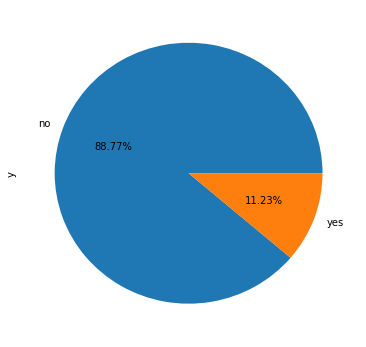

no     32908
yes     4161
Name: y, dtype: int64

In [9]:
# From the original 37069 records, we found there are 11.23% of customers 
# Do Deposition in ANK after visited.(yes)
df['y'].value_counts().plot.pie(autopct='%1.2f%%', figsize=(6, 6))
plt.show()
df['y'].value_counts()


In [10]:
# For numerical data, the index of results includes counts, mean values, 
# standard deviations, minimum values, three percentiles and maximum values.
df.describe()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000
mean,40.043783,258.374868,2.573552,962.543419,0.172570,0.082759,93.575098,-40.502147,3.622370,5167.150813
std,10.395798,260.203020,2.786845,186.740644,0.494031,1.571270,0.579297,4.630409,1.733892,72.168914
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,320.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [11]:
# For object and bool data, the automatically calculated fields are count (non-null value)
# ,unique (unique value), top (highest frequency) and freq (highest frequency).
df.describe(include=['object', 'bool'])


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,37069,37069,37069,37069,37069,37069,37069,37069,37069,37069,37069
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,9380,22426,10931,29301,19447,30595,23506,12351,7757,32018,32908


In [12]:
# People with a duration of ZERO will definitely not save in the future,
# so these lines of data need to be deleted.
df[(df['duration'] == 0)]


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
6357,31,blue-collar,married,basic.9y,no,no,no,cellular,may,mon,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,no
20340,59,management,married,university.degree,no,yes,no,cellular,aug,tue,...,10,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
23701,39,admin.,married,high.school,no,yes,no,telephone,may,tue,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
28288,53,blue-collar,divorced,high.school,no,yes,no,cellular,apr,fri,...,3,999,0,nonexistent,-1.8,93.075,-47.1,1.479,5099.1,no


In [13]:
# Delete the record that the call duration is ZERO.
df.drop(df.index[(df['duration'] == 0)], inplace=True)
df1 = df.copy()
df.shape


(37065, 21)

In [14]:
# Map the Dependent-variable (yes or no) to a Dummy-variable (0 or 1).

df.loc[df['y'] == 'no', 'y'] = 0
df.loc[df['y'] == 'yes', 'y'] = 1
y = pd.get_dummies(df['y'], columns=['y'], prefix=['y'], drop_first=True)



## 1.1 Bank client data Analisys and Categorical Treatment
    To make things more clear, I'm going to creat a new datasets that contains just this part of data

In [15]:
# In order to better analyze the data, we separately extract the data of 0~7 rows 
# in the dataset, which constitutes a sub-dataset of customer information.
bank_client = df.iloc[:, 0:7]


In [16]:
bank_client.head()


,age,job,marital,education,default,housing,loan
0,32,management,married,professional.course,unknown,no,no
1,41,admin.,married,high.school,no,yes,yes
2,32,admin.,married,university.degree,no,yes,no
3,37,admin.,married,high.school,no,unknown,unknown
4,38,admin.,divorced,university.degree,no,no,no


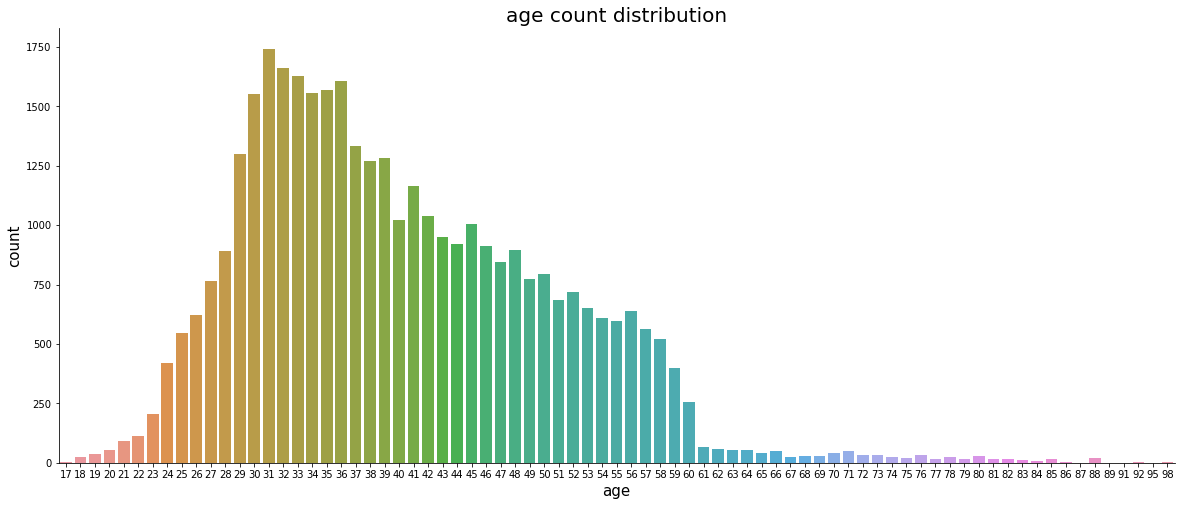

In [17]:
# The age distribution of the sample dataset.
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x='age', data=bank_client)
ax.set_xlabel('age', fontsize=15)
ax.set_ylabel('count', fontsize=15)
ax.set_title('age count distribution', fontsize=20)
sns.despine()


In [18]:
print('1st Quartile: ', bank_client['age'].quantile(q=0.25))
print('2nd Quartile:', bank_client['age'].quantile(q=0.50))
print('3rd Qartile:', bank_client['age'].quantile(q=0.75))
print('4th Quartile:', bank_client['age'].quantile(q=1.0))

print('Age above: ', bank_client['age'].quantile(q=0.75) + 1.5 * (
        bank_client['age'].quantile(q=0.75) - bank_client['age'].quantile(q=0.25)), 'are outliers')


1st Quartile:  32.0
2nd Quartile: 38.0
3rd Qartile: 47.0
4th Quartile: 98.0
Age above:  69.5 are outliers


In [19]:
#age离群值所占的比例
print('Numerber of outliers: ', bank_client[bank_client['age'] > 69.6]['age'].count())
print('Number of clients: ', len(bank_client))
#Outliers in %
print('Outliers are:', round(bank_client[bank_client['age'] > 69.6]['age'].count() * 100 / len(bank_client), 2), '%')

# The mean value of the age.
print('MEAN:', round(df['age'].mean(), 1))


Numerber of outliers:  419
Number of clients:  37065
Outliers are: 1.13 %
MEAN: 40.0


In [20]:
bank_client_temp = bank_client.copy()

In [21]:
def quartileMap(data,column_name):
    q1= data[column_name].quantile(q=0.25)
    q2= data[column_name].quantile(q=0.5)
    q3= data[column_name].quantile(q=0.75)
    q_lower=q1-1.5*(q3-q1)
    q_upper=q3+1.5*(q3-q1)
    print(q1,q2,q3,q_lower,q_upper)
    
    data.loc[data[column_name] <q_lower, column_name] = 0
    data.loc[(data[column_name] >= q_lower) & (data[column_name] < q1), column_name] = 1
    data.loc[(data[column_name] >= q1 ) & (data[column_name] < q2), column_name] = 2
    data.loc[(data[column_name] >= q2) & (data[column_name] < q3), column_name] = 3
    data.loc[(data[column_name] >= q3) & (data[column_name] <= q_upper), column_name] = 4
    data.loc[data[column_name] > q_upper, column_name] = 5
    return data


In [22]:
#to age
quartileMap(bank_client_temp,'age')
bank_client_temp.head()

32.0 38.0 47.0 9.5 69.5


,age,job,marital,education,default,housing,loan
0,2,management,married,professional.course,unknown,no,no
1,3,admin.,married,high.school,no,yes,yes
2,2,admin.,married,university.degree,no,yes,no
3,2,admin.,married,high.school,no,unknown,unknown
4,3,admin.,divorced,university.degree,no,no,no


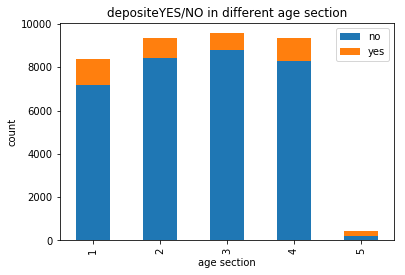

'YES in age'    percentage/%

1    14.311313
2     9.903846
3     8.246237
4    11.201455
5    47.732697
Name: age, dtype: float64


In [23]:
# The picture below says that in different occupations, the ratio costumers choose to between saving and not saving
fig = plt.figure()
fig.set(alpha=0.2)

y_0 = bank_client_temp.age[df.y == 0].value_counts()
y_1 = bank_client_temp.age[df.y == 1].value_counts()
df_a = pd.DataFrame({u'yes': y_1, u'no': y_0})
df_a.plot(kind='bar', stacked=True)
plt.title(u"depositeYES/NO in different age section")
plt.xlabel(u"age section")
plt.ylabel(u"count")
plt.show()
#The chart below reflects that different duration section have the different ratio of Do or Not Depostion in ANZ.

print("'YES in age'    percentage/%")
print("")
yes_in_age = y_1 / (bank_client_temp.age.value_counts()) * 100
print(yes_in_age)
# The ratio of costomers in different jobs that Do Depostion in the end.
# And the graph told us that "retired" and "student" are the highest two groups that Do Depostion in ANZ.


In [24]:
# Understanding classification variables.
print('job:\n', bank_client['job'].unique())
print('marital\n', bank_client['marital'].unique())
print('education\n', bank_client['education'].unique())
print('default\n', bank_client['default'].unique())
print('housing\n', bank_client['housing'].unique())
print('loan\n', bank_client['loan'].unique())


job:
 ['management' 'admin.' 'blue-collar' 'services' 'technician' 'retired'
 'unemployed' 'housemaid' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital
 ['married' 'divorced' 'single' 'unknown']
education
 ['professional.course' 'high.school' 'university.degree' 'basic.9y'
 'basic.4y' 'unknown' 'basic.6y' 'illiterate']
default
 ['unknown' 'no' 'yes']
housing
 ['no' 'yes' 'unknown']
loan
 ['no' 'yes' 'unknown']


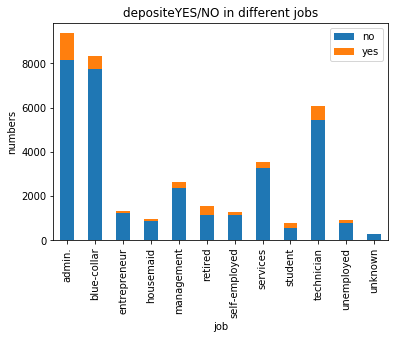

'YES in jobs'    percentage/%

admin.           13.018445
blue-collar       6.915596
entrepreneur      8.754717
housemaid        10.134436
management       11.115312
retired          25.716146
self-employed    10.031348
services          7.936955
student          31.619537
technician       10.617284
unemployed       13.686534
unknown          12.162162
Name: job, dtype: float64


In [25]:
# The picture below says that in different occupations, the ratio costumers choose to between saving and not saving
fig = plt.figure()
fig.set(alpha=0.2)

y_0 = df.job[df.y == 0].value_counts()
y_1 = df.job[df.y == 1].value_counts()
df_a = pd.DataFrame({u'yes': y_1, u'no': y_0})
df_a.plot(kind='bar', stacked=True)
plt.title(u"depositeYES/NO in different jobs")
plt.xlabel(u"job")
plt.ylabel(u"numbers")
plt.show()
#The chart below reflects that different jobs have the different ratio of Do or Not Depostion in ANZ.

print("'YES in jobs'    percentage/%")
print("")
yes_in_jobs = y_1 / (df.job.value_counts()) * 100
print(yes_in_jobs)
# The ratio of costomers in different jobs that Do Depostion in the end.
# And the graph told us that "retired" and "student" are the highest two groups that Do Depostion in ANZ.


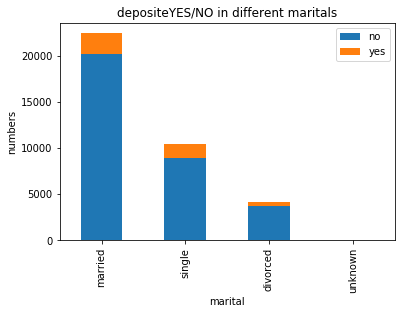

'YES in jobs'    percentage/%
married     10.087856
single      13.986551
divorced    10.365560
unknown     16.216216
Name: marital, dtype: float64


In [26]:
# The picture below says that in different marital, the ratio costumers choose to between saving and not saving
fig = plt.figure()
fig.set(alpha=0.2)
 
y_0 = df.marital[df.y == 0].value_counts()
y_1 = df.marital[df.y == 1].value_counts()
df_a = pd.DataFrame({u'yes': y_1, u'no': y_0})
df_a.plot(kind='bar', stacked=True)
plt.title(u"depositeYES/NO in different maritals")
plt.xlabel(u"marital")
plt.ylabel(u"numbers")
plt.show()
#The chart below reflects that different jobs have the different ratio of Do or Not Depostion in ANK.

print("'YES in jobs'    percentage/%")
yes_in_maritals = y_1 / (df.marital.value_counts()) * 100
print(yes_in_maritals)
# The ratio of costomers in different marital situation that Do Depostion in the end.
# And the graph told us that "single" persons are willing to Do Depostion in ANK.


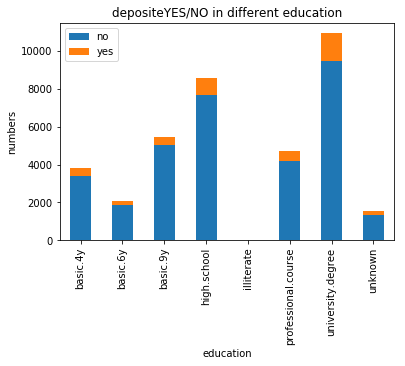

'YES in jobs'    percentage/%
basic.4y               10.052770
basic.6y                8.349515
basic.9y                8.002937
high.school            10.639542
illiterate             25.000000
professional.course    11.403695
university.degree      13.595608
unknown                15.073765
Name: education, dtype: float64


In [27]:
# The picture below says that in different education-level, the ratio costumers choose to between 
# saving and not saving
fig = plt.figure()
fig.set(alpha=0.2)

y_0 = df.education[df.y == 0].value_counts()
y_1 = df.education[df.y == 1].value_counts()
df_a = pd.DataFrame({u'yes': y_1, u'no': y_0})
df_a.plot(kind='bar', stacked=True)
plt.title(u"depositeYES/NO in different education")
plt.xlabel(u"education")
plt.ylabel(u"numbers")
plt.show()
#The chart below reflects that different education have the different ratio of Do or Not Depostion in ANK.

print("'YES in jobs'    percentage/%")
yes_in_education = y_1 / (df.education.value_counts()) * 100
print(yes_in_education)
# The ratio of costomers in different education level that Do Depostion in the end.
# And the graph told us that "single" persons are willing to Do Depostion in ANK.


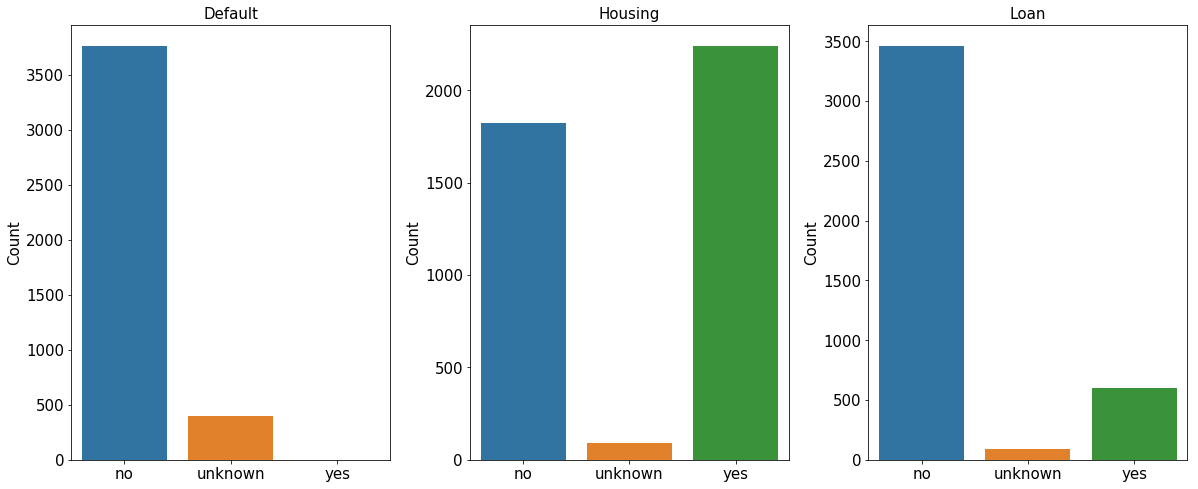

In [28]:
# 查看会存款的客户的信用情况、房贷、个人贷款的分布情况
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))
sns.countplot(x='default', data=bank_client[df['y'] == 1], ax=ax1, order=['no', 'unknown', 'yes'])
ax1.set_title('Default', fontsize=15)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=15)
ax1.tick_params(labelsize=15)

# Housing
sns.countplot(x='housing', data=bank_client[df['y'] == 1], ax=ax2, order=['no', 'unknown', 'yes'])
ax2.set_title('Housing', fontsize=15)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=15)
ax2.tick_params(labelsize=15)

# Loan
sns.countplot(x='loan', data=bank_client[df['y'] == 1], ax=ax3, order=['no', 'unknown', 'yes'])
ax3.set_title('Loan', fontsize=15)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.25)


In [29]:
# 银行客户数据的离散列值转换为连续值
# 标签编码顺序按照字母顺序排列
from sklearn.preprocessing import LabelEncoder

labelencoder_X = LabelEncoder()
bank_client['job'] = labelencoder_X.fit_transform(bank_client['job'])
bank_client['marital'] = labelencoder_X.fit_transform(bank_client['marital'])
bank_client['education'] = labelencoder_X.fit_transform(bank_client['education'])
bank_client['default'] = labelencoder_X.fit_transform(bank_client['default'])
bank_client['housing'] = labelencoder_X.fit_transform(bank_client['housing'])
bank_client['loan'] = labelencoder_X.fit_transform(bank_client['loan'])


In [30]:
bank_client.head()


,age,job,marital,education,default,housing,loan
0,32,4,1,5,1,0,0
1,41,0,1,3,0,2,2
2,32,0,1,6,0,2,0
3,37,0,1,3,0,1,1
4,38,0,0,6,0,0,0


## 1.2 Relatede with the last contact of the current campaign
    Treate categorical, see those values
    group continuous variables if necessary

In [31]:
# Slicing DataFrame to treat separately, make things more easy
bank_related = df.iloc[:, 7:11]
bank_related.head()


,contact,month,day_of_week,duration
0,cellular,jul,mon,565
1,cellular,apr,mon,982
2,cellular,may,mon,188
3,cellular,jul,thu,56
4,cellular,jul,tue,419


In [32]:
# Quartiles（四分位数）
print('1º Quartile: ', bank_related['duration'].quantile(q=0.25))
print('2º Quartile: ', bank_related['duration'].quantile(q=0.50))
print('3º Quartile: ', bank_related['duration'].quantile(q=0.75))
print('4º Quartile: ', bank_related['duration'].quantile(q=1.00))
#Calculate the outliers:
# Interquartile range, IQR = Q3 - Q1
# lower 1.5*IQR whisker = Q1 - 1.5 * IQR
# Upper 1.5*IQR whisker = Q3 + 1.5 * IQR

print('Duration calls above: ', bank_related['duration'].quantile(q=0.75) +
      1.5 * (bank_related['duration'].quantile(q=0.75) - bank_related['duration'].quantile(q=0.25)), 'are outliers')

# 通话时间离群值所占比例
print('Numerber of outliers: ', bank_related[bank_related['duration'] > 644.5]['duration'].count())
print('Number of clients: ', len(bank_related))
#Outliers in %
print('Outliers are:',
      round(bank_related[bank_related['duration'] > 644.5]['duration'].count() * 100 / len(bank_related), 2), '%')


1º Quartile:  102.0
2º Quartile:  180.0
3º Quartile:  320.0
4º Quartile:  4918.0
Duration calls above:  647.0 are outliers
Numerber of outliers:  2674
Number of clients:  37065
Outliers are: 7.21 %


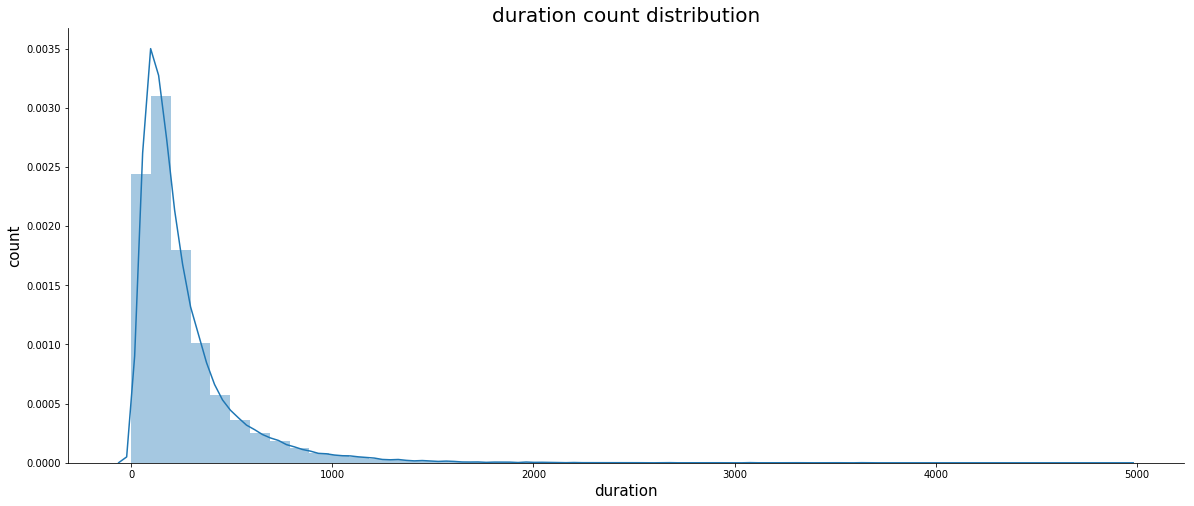

In [33]:
# The duration distribution of the sample dataset.
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.distplot(bank_related['duration'])
ax.set_xlabel('duration', fontsize=15)
ax.set_ylabel('count', fontsize=15)
ax.set_title('duration count distribution', fontsize=20)
sns.despine()


In [34]:
bank_related_temp = bank_related.copy()


In [35]:
#to duration
quartileMap(bank_related_temp,'duration')
bank_related_temp.head()

102.0 180.0 320.0 -225.0 647.0


,contact,month,day_of_week,duration
0,cellular,jul,mon,4
1,cellular,apr,mon,5
2,cellular,may,mon,3
3,cellular,jul,thu,1
4,cellular,jul,tue,4


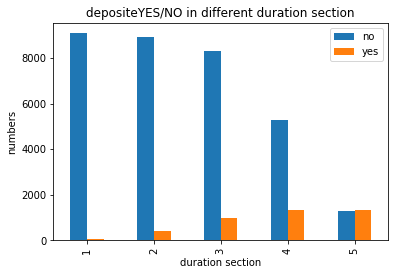

'YES in duration'    percentage/%

1     0.840887
2     4.559530
3    10.394652
4    20.241875
5    51.017332
Name: duration, dtype: float64


In [36]:
# The picture below says that in different occupations, the ratio costumers choose to between saving and not saving
fig = plt.figure()
fig.set(alpha=0.2)

y_0 = bank_related_temp.duration[df.y == 0].value_counts()
y_1 = bank_related_temp.duration[df.y == 1].value_counts()
df_a = pd.DataFrame({u'yes': y_1, u'no': y_0})
df_a.plot(kind='bar')
plt.title(u"depositeYES/NO in different duration section")
plt.xlabel(u"duration section")
plt.ylabel(u"numbers")
plt.show()
#The chart below reflects that different duration section have the different ratio of Do or Not Depostion in ANZ.

print("'YES in duration'    percentage/%")
print("")
yes_in_duration = y_1 / (bank_related_temp.duration.value_counts()) * 100
print(yes_in_duration)
# The ratio of costomers in different jobs that Do Depostion in the end.
# And the graph told us that "retired" and "student" are the highest two groups that Do Depostion in ANZ.


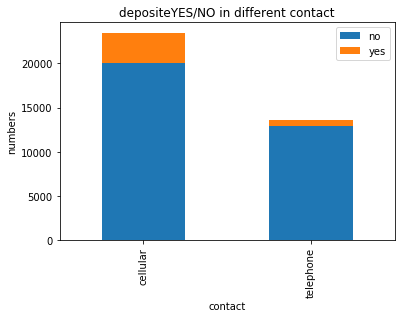

'YES in contact'    percentage/%

cellular     14.674722
telephone     5.249963
Name: contact, dtype: float64


In [37]:
# The picture below says that in different occupations, the ratio costumers choose to between saving and not saving
fig = plt.figure()
fig.set(alpha=0.2)
 
y_0 = bank_related_temp.contact[df.y == 0].value_counts()
y_1 = bank_related_temp.contact[df.y == 1].value_counts()
df_a = pd.DataFrame({u'yes': y_1, u'no': y_0})
df_a.plot(kind='bar', stacked=True)
plt.title(u"depositeYES/NO in different contact")
plt.xlabel(u"contact")
plt.ylabel(u"numbers")
plt.show()
#The chart below reflects that different duration section have the different ratio of Do or Not Depostion in ANZ.

print("'YES in contact'    percentage/%")
print("")
yes_in_contact = y_1 / (bank_related_temp.contact.value_counts()) * 100
print(yes_in_contact)
# The ratio of costomers in different jobs that Do Depostion in the end.
# And the graph told us that "retired" and "student" are the highest two groups that Do Depostion in ANZ.


In [38]:
print("Kind of Contact: \n", bank_related['contact'].unique())
print("\nWhich monthis this campaing work: \n", bank_related['month'].unique())
print("\nWhich days of week this campaing work: \n", bank_related['day_of_week'].unique())


Kind of Contact: 
 ['cellular' 'telephone']

Which monthis this campaing work: 
 ['jul' 'apr' 'may' 'jun' 'nov' 'aug' 'oct' 'sep' 'dec' 'mar']

Which days of week this campaing work: 
 ['mon' 'thu' 'tue' 'wed' 'fri']


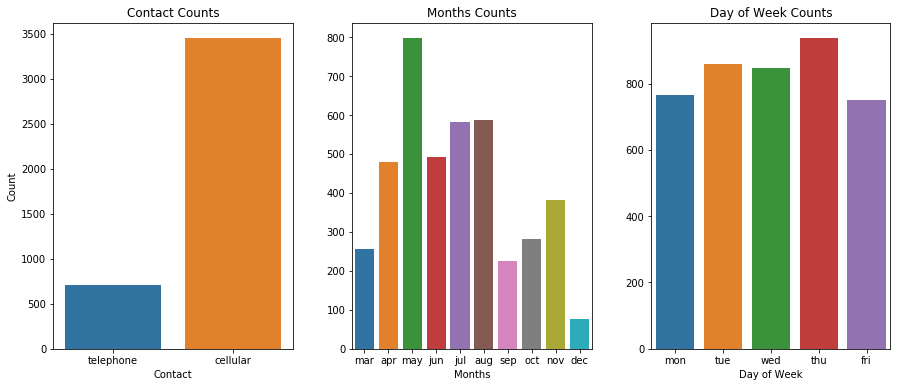

In [39]:
#Contact
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))
sns.countplot(bank_related['contact'][df['y'] == 1], ax=ax1)
ax1.set_xlabel('Contact', fontsize=10)
ax1.set_ylabel('Count', fontsize=10)
ax1.set_title('Contact Counts')
ax1.tick_params(labelsize=10)
#Months
sns.countplot(bank_related['month'][df['y'] == 1], ax=ax2,
              order=['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax2.set_xlabel('Months', fontsize=10)
ax2.set_ylabel('')
ax2.set_title('Months Counts')
ax2.tick_params(labelsize=10)
#day_of_week
sns.countplot(bank_related['day_of_week'][df['y'] == 1], ax=ax3, order=['mon', 'tue', 'wed', 'thu', 'fri'])
ax3.set_xlabel('Day of Week', fontsize=10)
ax3.set_ylabel('')
ax3.set_title('Day of Week Counts')
ax3.tick_params(labelsize=10)
plt.subplots_adjust(wspace=0.25)


In [40]:
# 对标签值进行编码
# 标签编码器顺序是按字母顺序排列

labelencoder_X = LabelEncoder()
bank_related['contact'] = labelencoder_X.fit_transform(bank_related['contact'])
bank_related['month'] = labelencoder_X.fit_transform(bank_related['month'])
bank_related['day_of_week'] = labelencoder_X.fit_transform(bank_related['day_of_week'])


In [41]:
bank_related.head()


,contact,month,day_of_week,duration
0,0,3,1,565
1,0,0,1,982
2,0,6,1,188
3,0,3,2,56
4,0,3,3,419


## 1.3 Social and economic context attributes 

In [43]:
# Social and economic context attributes
bank_se = df.loc[:, ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
bank_se.head()


,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.4,93.918,-42.7,4.962,5228.1
1,-1.8,93.075,-47.1,1.405,5099.1
2,-1.8,92.893,-46.2,1.299,5099.1
3,1.4,93.918,-42.7,4.968,5228.1
4,1.4,93.918,-42.7,4.961,5228.1


## 1.4 Other attributes 

In [44]:
# Other Attributes
bank_o = df.loc[:, ['campaign', 'pdays', 'previous', 'poutcome']]
bank_o.head()


,campaign,pdays,previous,poutcome
0,4,999,0,nonexistent
1,1,999,0,nonexistent
2,2,999,0,nonexistent
3,3,999,0,nonexistent
4,8,999,0,nonexistent


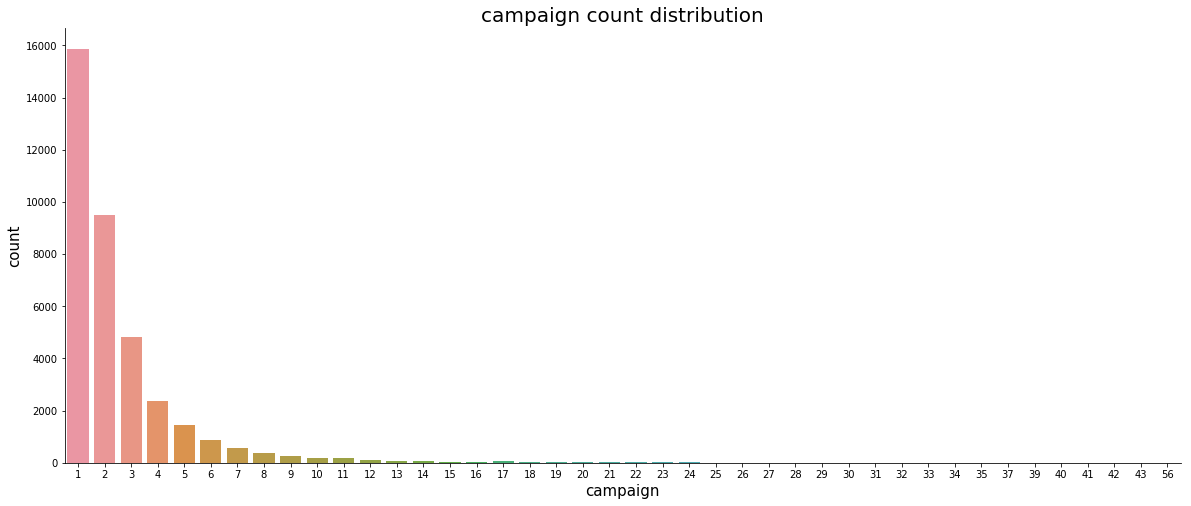

In [45]:
# The camgaign distribution of the sample dataset.
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x='campaign', data=bank_o)
ax.set_xlabel('campaign', fontsize=15)
ax.set_ylabel('count', fontsize=15)
ax.set_title('campaign count distribution', fontsize=20)
sns.despine()


In [46]:
print('1st Quartile: ', bank_o['campaign'].quantile(q=0.25))
print('2nd Quartile:', bank_o['campaign'].quantile(q=0.50))
print('3rd Qartile:', bank_o['campaign'].quantile(q=0.75))
print('4th Quartile:', bank_o['campaign'].quantile(q=1.0))


1st Quartile:  1.0
2nd Quartile: 2.0
3rd Qartile: 3.0
4th Quartile: 56.0


In [47]:
print('Duration calls above: ', bank_o['campaign'].quantile(q=0.75) +
      1.5 * (bank_o['campaign'].quantile(q=0.75) - bank_o['campaign'].quantile(q=0.25)), 'are outliers')

# campaign离群值所占比例
print('Numerber of outliers: ', bank_o[bank_o['campaign'] > 6.0]['campaign'].count())
print('Number of clients: ', len(bank_o))
#Outliers in %
print('Outliers are:',
      round(bank_o[bank_o['campaign'] > 6.0]['campaign'].count() * 100 / len(bank_o), 2), '%')


Duration calls above:  6.0 are outliers
Numerber of outliers:  2186
Number of clients:  37065
Outliers are: 5.9 %


In [48]:
print(bank_o['poutcome'].unique())


['nonexistent' 'failure' 'success']


In [49]:
#对poutcome进行编码
labelencoder_X = LabelEncoder()
bank_o['poutcome'] = labelencoder_X.fit_transform(bank_o['poutcome'])


In [50]:
bank_o.head()


,campaign,pdays,previous,poutcome
0,4,999,0,1
1,1,999,0,1
2,2,999,0,1
3,3,999,0,1
4,8,999,0,1


## 1.5 Concat the Processed Dataset

In [51]:
bank_final = pd.concat([bank_client, bank_related, bank_se, bank_o], axis=1)
bank_final = bank_final[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                         'contact', 'month', 'day_of_week', 'duration', 'emp.var.rate', 'cons.price.idx',
                         'cons.conf.idx', 'euribor3m', 'nr.employed', 'campaign', 'pdays', 'previous',
                         'poutcome']]
bank_final.shape


(37065, 20)

In [52]:
bank_final.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,pdays,previous,poutcome
0,32,4,1,5,1,0,0,0,3,1,565,1.4,93.918,-42.7,4.962,5228.1,4,999,0,1
1,41,0,1,3,0,2,2,0,0,1,982,-1.8,93.075,-47.1,1.405,5099.1,1,999,0,1
2,32,0,1,6,0,2,0,0,6,1,188,-1.8,92.893,-46.2,1.299,5099.1,2,999,0,1
3,37,0,1,3,0,1,1,0,3,2,56,1.4,93.918,-42.7,4.968,5228.1,3,999,0,1
4,38,0,0,6,0,0,0,0,3,3,419,1.4,93.918,-42.7,4.961,5228.1,8,999,0,1


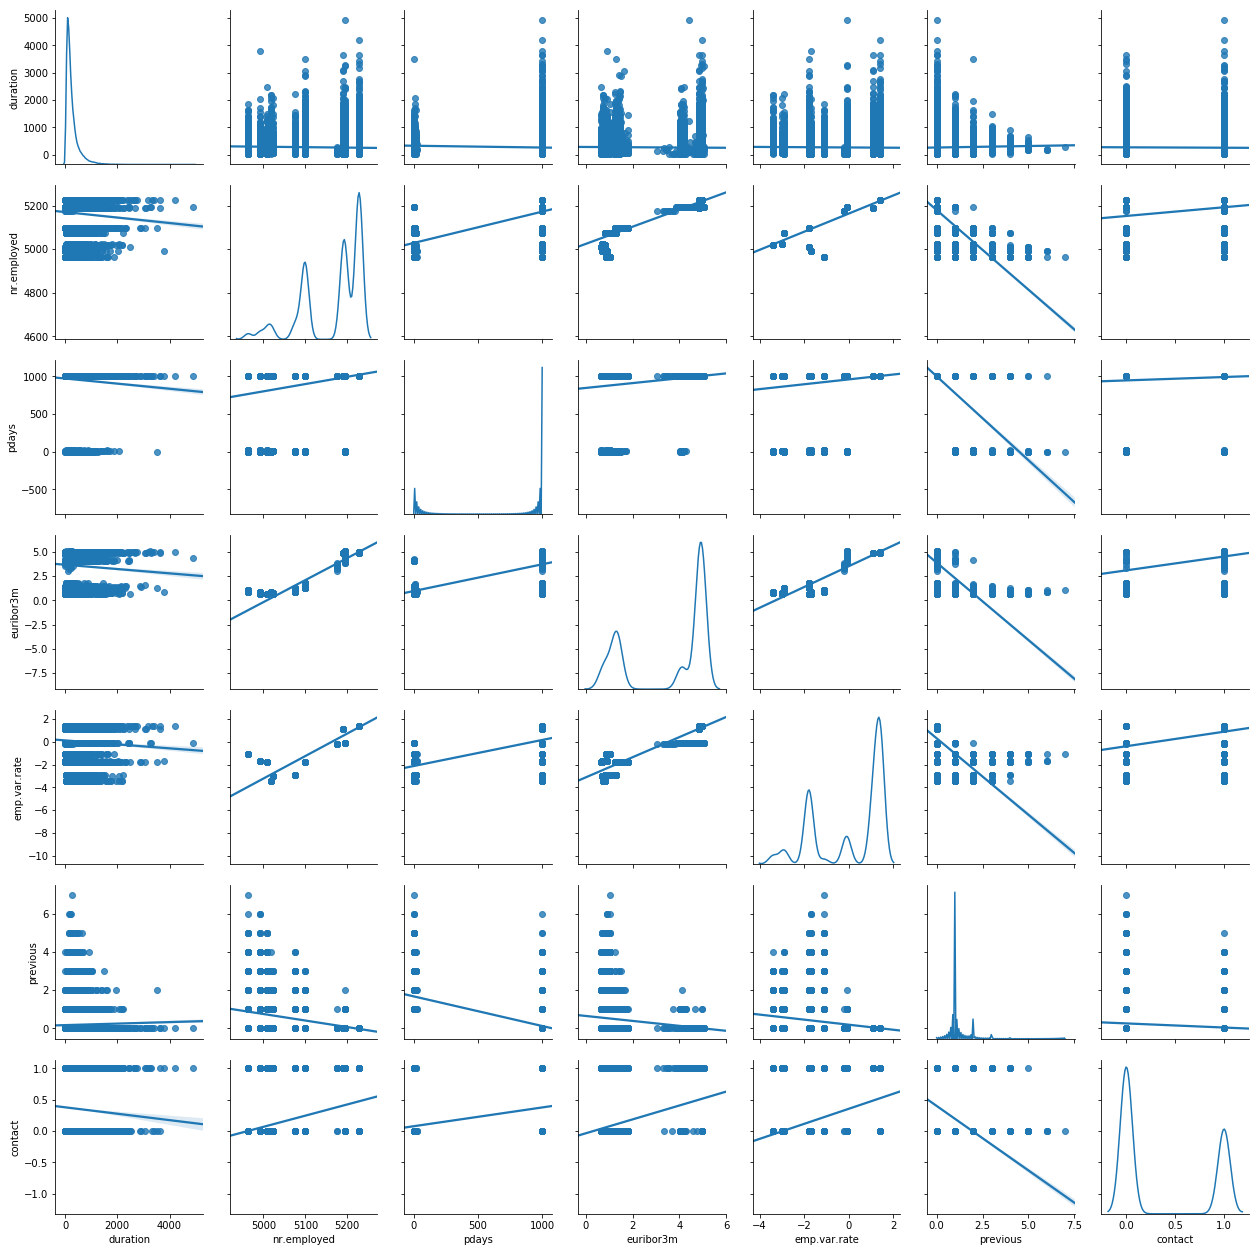

In [53]:
sns.pairplot(bank_final, diag_kind='kde', kind='reg',
             vars=['duration', 'nr.employed','pdays', 'euribor3m',  'emp.var.rate', 'previous', 'contact'])


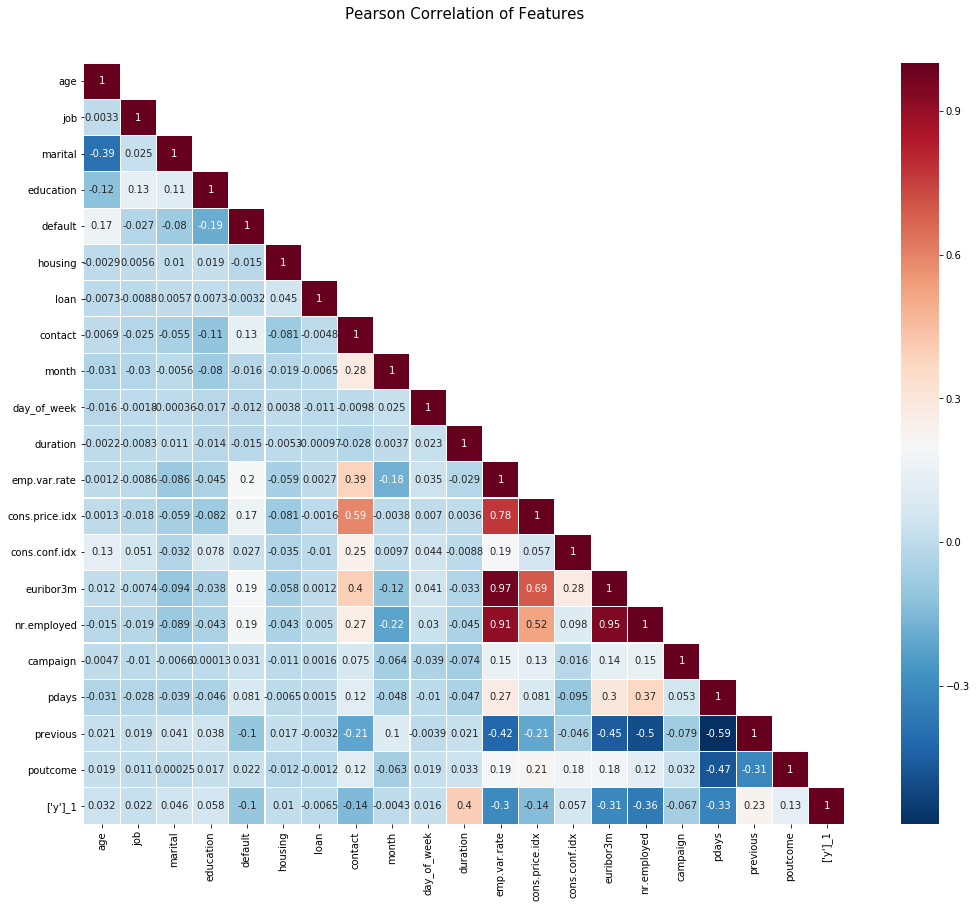

In [54]:
#各特征间的皮尔逊相关系数
#相关系数分类（负数同理）
#0.8-1.0 极强相关
#0.6-0.8 强相关
#0.4-0.6 中等程度相关
#0.2-0.4 弱相关
#0.0-0.2 极弱相关或无相关
cor_mat = pd.concat([bank_final, y], axis=1).corr()
#colormap = plt.cm.viridis
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
plt.figure(figsize=(20, 14))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data=cor_mat, linewidths=0.1, cmap='RdBu_r', vmax=1.0, mask=mask, square=True, linecolor='white',
            annot=True, cbar=True)


In [55]:
#根据上面的皮尔逊相关系数，对不同特征之间相关性极强或强的特征进行一些剔除
#因为它们关联性越强越（即越线性相关），越可以看成一个特征

bank_final.drop(['emp.var.rate', 'cons.price.idx'], axis=1, inplace=True)
bank_final.shape


(37065, 18)

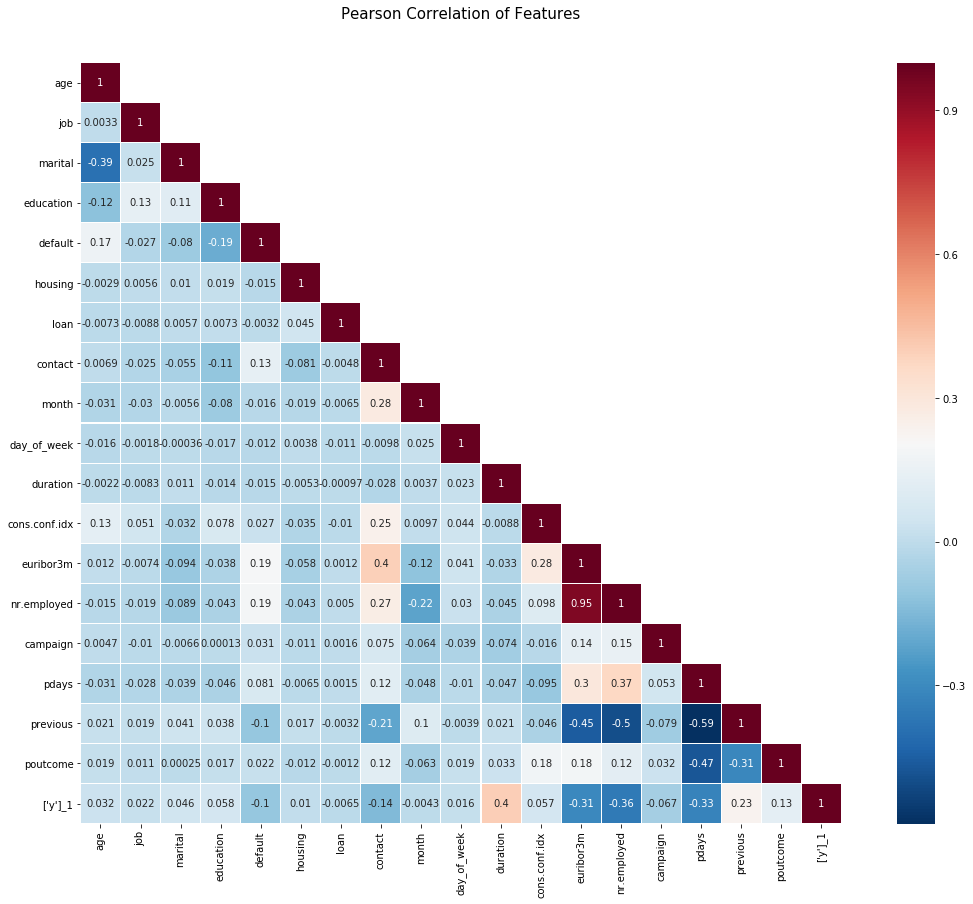

In [56]:
#再次观察经过处理后的皮尔逊相关系数
#发现已经没有某两个特征之间有极强相关或者强相关的情况

cor_mat = pd.concat([bank_final, y], axis=1).corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
plt.figure(figsize=(20, 14))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data=cor_mat, linewidths=0.1, cmap='RdBu_r', vmax=1.0, mask=mask, square=True, linecolor='white',
            annot=True, cbar=True)


# 2. Modeling
## The first layer
### Logistic Regression, Random Forest Classifier, Gradient Boosting Classifier
## The second layer
### Gradient Boosting Classifier

In [57]:
#将DataFrame类型转换成ndarray类型
X_final = bank_final.values
y_final = y.values


In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, random_state=0, test_size=0.2)


In [59]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


In [60]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import KFold
from sklearn.cross_validation import KFold
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#from xgboost import XCBClassifier

n_folds = 10
clfs = [LogisticRegression(random_state=1),
        #AdaBoostClassifier(n_estimators=500, learning_rate=0.1),
        #ExtraTreesClassifier(n_estimators=500, n_jobs=-1, criterion='gini'),
        #KNeighborsClassifier(n_neighbors=2),
        #SVC(kernel='linear', C=0.025),
        #ExtraTreesClassifier(n_estimators=100, n_jobs=-1, criterion='entropy'),
        #XGBClassifier(n_estimators=100, max_depth=6, min_child_weight=2, gamma=0.9, subsample=0.8),
        RandomForestClassifier(n_estimators=100, n_jobs=-1, criterion='entropy'),
        GradientBoostingClassifier(learning_rate=0.05, subsample=0.5, max_depth=6, n_estimators=100)]
print("Creating train and test sets for stacking.")
dataset_blend_train = np.zeros((X_train.shape[0], len(clfs)))  #训练集样本个数（行），融合算法个数（列）
dataset_blend_test = np.zeros((X_test.shape[0], len(clfs)))  #测试集样本个数（行），融合算法个数（列）
kf = list(KFold(y_train.shape[0], n_folds, random_state=100))
for j, clf in enumerate(clfs):
    print(j + 1, clf)
    dataset_blend_test_j = np.zeros((X_test.shape[0], n_folds))  #测试集样本个数（行），交叉验证折数（列）
    for i, (train, test) in enumerate(kf):
        print("Fold", i, end='\t')
        X_train_b = X_train[train]
        y_train_b = y_train[train]
        X_test_b = X_train[test]
        y_test_b = y_train[test]
        clf.fit(X_train_b, y_train_b)
        y_submission = clf.predict_proba(X_test_b)[:, 1]
        dataset_blend_train[test, j] = y_submission
        dataset_blend_test_j[:, i] = clf.predict_proba(X_test)[:, 1]
    print()
    dataset_blend_test[:, j] = dataset_blend_test_j.mean(1)

n = 0
y_test_pred_proba=np.zeros((X_test.shape[0],len(clfs)))
for model in clfs:
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    y_test_pred_proba[:,n]=model.predict_proba(X_test)[:,1]
    print("Model %d, Accuracy %0.6f." % (n, accuracy_score(y_test, y_test_pred)))
    n = n + 1


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Creating train and test sets for stacking.
1 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
Fold 0	Fold 1	Fold 2	Fold 3	Fold 4	Fold 5	Fold 6	Fold 7	Fold 8	Fold 9	
2 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Fold 0	Fold 1	Fold 2	Fold 3	Fold 4	Fold 5	Fold 6	Fold 7	Fold 8	Fold 9	
3 GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_de

In [61]:
#模型融合
print("Stacking.")
logmodel = GradientBoostingClassifier()
logmodel.fit(dataset_blend_train, y_train)
y_score = logmodel.predict(dataset_blend_test)
print("Stacking Accuracy %0.6f." % accuracy_score(y_test, y_score))


Stacking.
Stacking Accuracy 0.922568.


# 3. Evaluation

## 3.1 ROC Curve and AUC
#### Accuracy is measured by the area under the ROC curve. An area of 1 represents a perfect test; an area of .5 represents a worthless test.

##### A rough guide for classifying the accuracy of a diagnostic test is the traditional academic point system:

.90-1 = excellent (A)

.80-.90 = good (B)

.70-.80 = fair (C)

.60-.70 = poor (D)

.50-.60 = fail (F)

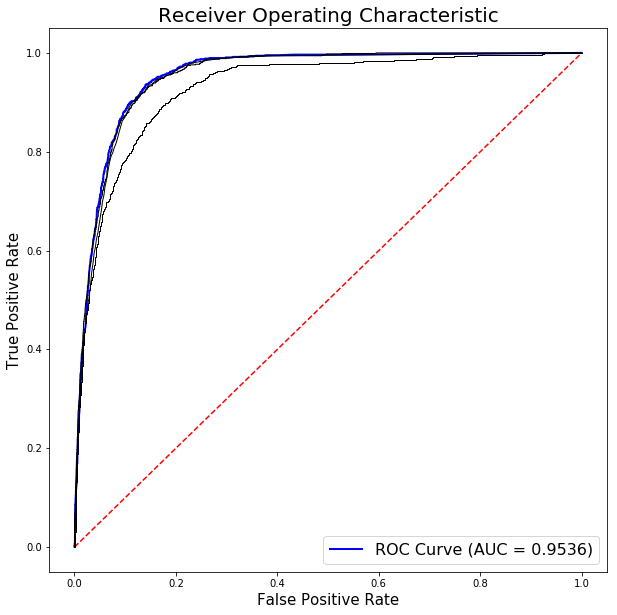

In [62]:
from sklearn.metrics import roc_curve, auc

# The Receiver Operating Characteristic & Area Under the Curve

fig, ax = plt.subplots(figsize=(8, 8))

#用线性回归和上面各模型预测结果（概率矩阵）来预测新的概率结果
probs = logmodel.predict_proba(dataset_blend_test)
preds = probs[:, 1]
fpr, tpr, threshold = roc_curve(y_test, preds)  #计算真正率、假正率
roc_auc = auc(fpr, tpr)  #计算AUC

ax.plot(fpr, tpr, 'b', lw=2, label='ROC Curve (AUC = %0.4f)' % roc_auc)  #假正例率为横坐标，真正例率为纵坐标
ax.plot([0, 1], [0, 1], 'r--')
for i in range(len(clfs)):
    fpri,tpri,thresholdi=roc_curve(y_test,y_test_pred_proba[:,i])
    roc_auc=auc(fpri,tpri)
    ax.plot(fpri,tpri,'b',lw=1,color='black')
ax.set_title('Receiver Operating Characteristic', fontsize=20)
ax.set_ylabel('True Positive Rate', fontsize=15)
ax.set_xlabel('False Positive Rate', fontsize=15)
ax.legend(loc='lower right', prop={'size': 16})


## 3.2 Analyzing the results
### So now we have to decide which one is the best model, and we have two types of wrong values:

###### False Positive, means the client do NOT SUBSCRIBED to term deposit, but the model thinks he did.
###### False Negative, means the client SUBSCRIBED to term deposit, but the model said he dont.
In my opinion:

The first one its most harmful, because we think that we already have that client but we don't and maybe we lost him in other future campaings
The second its not good but its ok, we have that client and in the future we'll discovery that in truth he's already our client
### So, our objective here, is to find the best model by confusion matrix with the lowest False Positive as possible.
Obs1 - lets go back and look the best confusion matrix that attend this criteria Obs2 - i'll do the math manualy to be more visible and understanding

In [63]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:\n", confusion_matrix(y_test, logmodel.predict(dataset_blend_test)))
print('Classification Reports:\n', classification_report(y_test, logmodel.predict(dataset_blend_test)))


Confusion Matrix:
 [[6344  199]
 [ 375  495]]
Classification Reports:
              precision    recall  f1-score   support

          0       0.94      0.97      0.96      6543
          1       0.71      0.57      0.63       870

avg / total       0.92      0.92      0.92      7413



### · PRECISION
#### TN / (TN + FN) [ MATRIX COLUMN 1 ]
For all NEGATIVE(0) PREDICTIONS by our model, how much we predict correct ?
#### TP / (FP + TP) [ MATRIX COLUMN 2 ]
For all POSITIVE(1) PREDICTIONS by our model, how much we predict correct ?

### · RECALL
#### TN / (TN + FP) [MATRIX LINE 1]
For all NEGATIVE(0) REAL VALUES how much we predict correct ?
#### TP / (FN + TP) [MATRIX LINE 2]
For all NEGATIVE(1) REAL VALUES how much we predict crrenct ?

### · F1-SCORE
#### F1-score is a "median" of Recall and Precision, consider this when you want a balance between  this metrics
#### f1_0=2(Precison(0) * Recall(0)) / (Precison(0) + Recall(0))
#### f1_1=2(Precison(1) * Recall(1)) / (Precison(1) + Recall(1))

### · AVG/TOTAL
#### This consider the weights of sum of REAL VALUES [line 1] [line 2]
#### e.g.  AVG_precision = precision(0) * (support(0) / support(*)) + precision(1) * (support(1) / support(*))